**Medical Data Visualizer**

In this project, you will visualize and make calculations from medical examination data using matplotlib, seaborn, and pandas. The dataset values were collected during medical examinations. You will use the dataset to explore the relationship between cardiac disease, body measurements, blood markers, and lifestyle choices.

###Instructions
Create a chart similar to examples/Figure_1.png, where we show the counts of good and bad outcomes for the cholesterol, gluc, alco, active, and smoke variables for patients with cardio=1 and cardio=0 in different panels. By each number in the medical_data_visualizer.py file, add the code from the associated instruction number below.

``` bash
1. Import the data from medical_examination.csv and assign it to the df variable.
2. Add an overweight column to the data. To determine if a person is overweight, first calculate their BMI by dividing their weight in kilograms by the square of their height in meters. If that value is > 25 then the person is overweight. Use the value 0 for NOT overweight and the value 1 for overweight.
3. Normalize data by making 0 always good and 1 always bad. If the value of cholesterol or gluc is 1, set the value to 0. If the value is more than 1, set the value to 1.
4. Draw the Categorical Plot in the draw_cat_plot function.
5. Create a DataFrame for the cat plot using pd.melt with values from cholesterol, gluc, smoke, alco, active, and overweight in the df_cat variable.
6. Group and reformat the data in df_cat to split it by cardio. Show the counts of each feature. You will have to rename one of the columns for the catplot to work correctly.
7. Convert the data into long format and create a chart that shows the value counts of the categorical features using the following method provided by the seaborn library import: sns.catplot().
8. Get the figure for the output and store it in the fig variable.

9. Draw the Heat Map in the draw_heat_map function.
10. Clean the data in the df_heat variable by filtering out the following patient segments that represent incorrect data:
- diastolic pressure is higher than systolic (Keep the correct data with (df['ap_lo'] <= df['ap_hi']))
- height is less than the 2.5th percentile (Keep the correct data with (df['height'] >= df['height'].quantile(0.025)))
- height is more than the 97.5th percentile
- weight is less than the 2.5th percentile
- weight is more than the 97.5th percentile
11. Calculate the correlation matrix and store it in the corr variable.
12. Generate a mask for the upper triangle and store it in the mask variable.
13. Set up the matplotlib figure.
14. Plot the correlation matrix using the method provided by the seaborn library import: sns.heatmap().

```

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


1. Import the data from medical_examination.csv and assign it to the df variable.

In [2]:
df = pd.read_csv('medical_examination.csv')

In [3]:
df.head()

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [4]:
df2 =df.isnull().sum()
df2


,0
id,0
age,0
sex,0
height,0
weight,0
ap_hi,0
ap_lo,0
cholesterol,0
gluc,0
smoke,0


2. Add an overweight column to the data. To determine if a person is overweight, first calculate their BMI by dividing their weight in kilograms by the square of their height in meters. If that value is > 25 then the person is overweight. Use the value 0 for NOT overweight and the value 1 for overweight.


In [5]:
#calculate the BMI
df['overweight'] = np.where(df['weight'] / ((df['height'] / 100) ** 2) > 25, 1, 0) # adds an overweight column and puts in the calculated bmi values

In [6]:
df.head()

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,0
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,0


3. Normalize data by making 0 always good and 1 always bad. If the value of cholesterol or gluc is 1, set the value to 0. If the value is more than 1, set the value to 1.

In [7]:
#Normalize the cholesterol and gluc columns; 0 == good & 1 == bad
df['cholesterol']= df['cholesterol'].apply(lambda x: 0 if x == 1 else 1)
df['gluc'] = df['gluc'].apply(lambda x: 0 if x == 1 else 1)

df.head()


,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,0,0,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,1,0,0,0,1,1,1
2,2,18857,1,165,64.0,130,70,1,0,0,0,0,1,0
3,3,17623,2,169,82.0,150,100,0,0,0,0,1,1,1
4,4,17474,1,156,56.0,100,60,0,0,0,0,0,0,0


4. Draw the Categorical Plot in the draw_cat_plot function
5. Create a DataFrame for the cat plot using pd.melt with values from cholesterol, gluc, smoke, alco, active, and overweight in the df_cat variable.
6. Group and reformat the data in df_cat to split it by cardio. Show the counts of each feature. You will have to rename one of the columns for the catplot to work correctly.
7. Convert the data into long format and create a chart that shows the value counts of the categorical features using the following method provided by the seaborn library import: sns.catplot().
8. Get the figure for the output and store it in the fig variable.

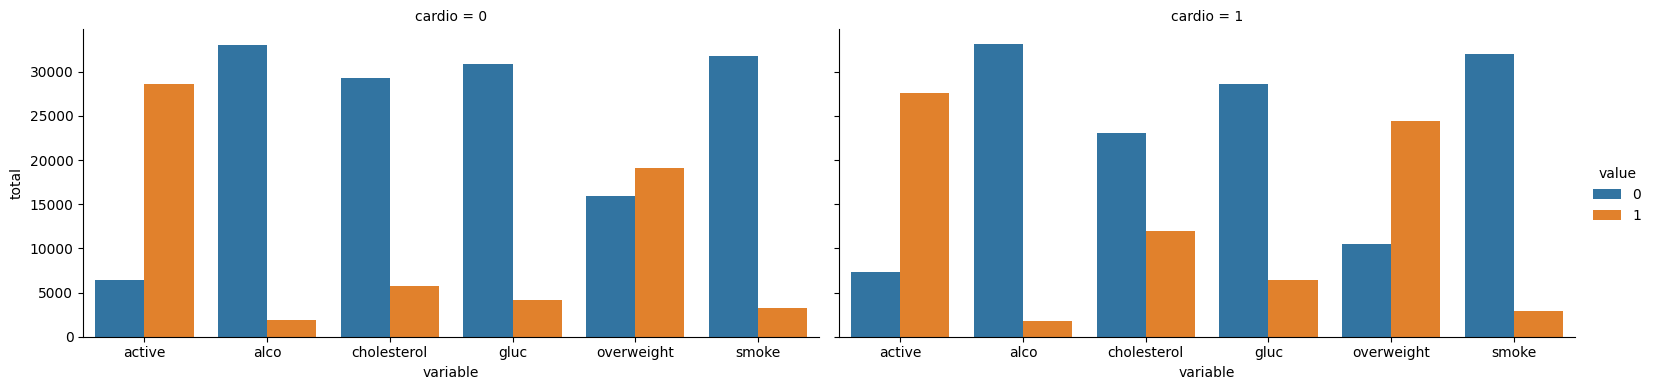

In [8]:
# function to draw a categorical plot
def draw_cat_plot(): #4
  # reshape the DataFrame(df) into long format
  df_cat = df.melt(id_vars = ['cardio'], value_vars= ['active', 'alco', 'cholesterol', 'gluc', 'overweight', 'smoke'], var_name = 'variable', value_name = 'value') #5
  df_cat = df_cat.groupby(['cardio', 'variable', 'value']).size().reset_index(name='total') #6
  cat_plot = sns.catplot(data=df_cat, x='variable', hue='value', col = 'cardio', kind = 'bar', height = 4, aspect = 2, y='total') #7
  fig = cat_plot.fig
  fig.savefig('catplot.png')
  plt.close(fig)
  return fig

draw_cat_plot()


9. Draw the Heat Map in the draw_heat_map function.
10. Clean the data in the df_heat variable by filtering out the following patient segments that represent incorrect data:
- diastolic pressure is higher than systolic (Keep the correct data with (df['ap_lo'] <= df['ap_hi']))
- height is less than the 2.5th percentile (Keep the correct data with (df['height'] >= df['height'].quantile(0.025)))
- height is more than the 97.5th percentile
- weight is less than the 2.5th percentile
- weight is more than the 97.5th percentile
11. Calculate the correlation matrix and store it in the corr variable.
12. Generate a mask for the upper triangle and store it in the mask variable
13. Set up the matplotlib figure.
14. Plot the correlation matrix using the method provided by the seaborn library import: sns.heatmap().

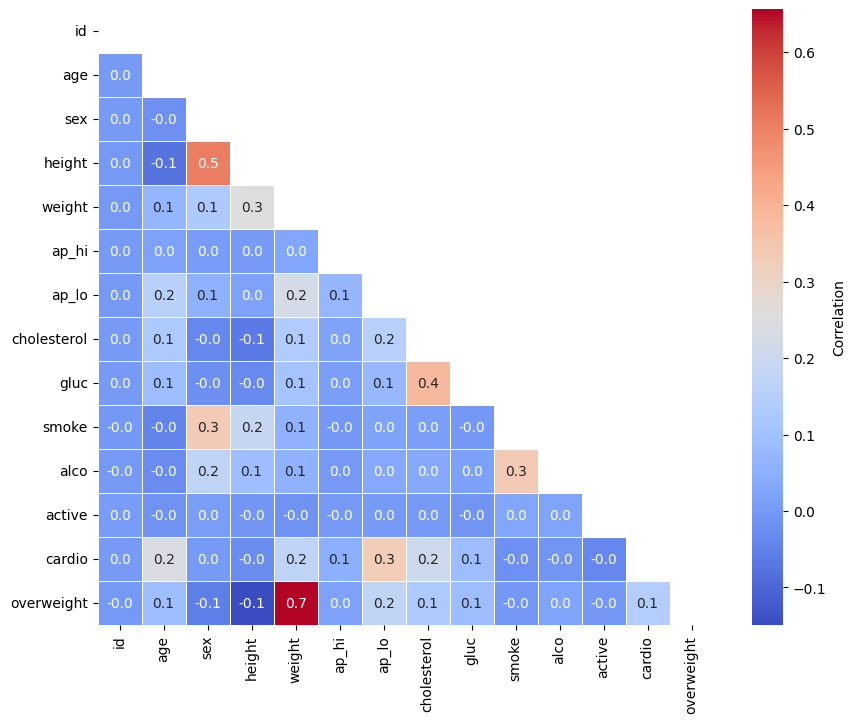

In [9]:
# function to draw Heat Map
def draw_heat_map():   #9

  df_heat = df.loc[                                       #10: Filter the DataFrame based on the conditions below
      (df['ap_lo'] <= df['ap_hi']) &
      (df['height'] >= df['height'].quantile(0.025)) &
      (df['height'] <= df['height'].quantile(0.975)) &
      (df['weight'] >= df['weight'].quantile(0.025)) &
      (df['weight'] <= df['weight'].quantile(0.975))
      ]

  corr = df_heat.corr()  #11 calculates the correlation matrix


  mask = np.triu(corr.values)  #12 generates a mask for the upper triangle

  plt.figure(figsize=(10, 8)) #13 setsup the matplotlib figure
  heat_map= sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.1f', linewidths=0.5, mask=mask,
            cbar_kws={'label': 'Correlation'}, square=True) #14 draw the heatmap based on the correlation matrix generated and display the lowerr triangle and mask the above


  fig = plt.gcf()
  fig.savefig('heatmap.png')
  plt.close(fig)
  return fig

draw_heat_map()

In [10]:
# run the unitest
!python3 -m unittest test_module

...['0.0', '0.0', '-0.0', '0.0', '-0.1', '0.5', '0.0', '0.1', '0.1', '0.3', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.2', '0.1', '0.0', '0.2', '0.1', '0.0', '0.1', '-0.0', '-0.1', '0.1', '0.0', '0.2', '0.0', '0.1', '-0.0', '-0.0', '0.1', '0.0', '0.1', '0.4', '-0.0', '-0.0', '0.3', '0.2', '0.1', '-0.0', '0.0', '0.0', '-0.0', '-0.0', '-0.0', '0.2', '0.1', '0.1', '0.0', '0.0', '0.0', '0.0', '0.3', '0.0', '-0.0', '0.0', '-0.0', '-0.0', '-0.0', '0.0', '0.0', '-0.0', '0.0', '0.0', '0.0', '0.2', '0.0', '-0.0', '0.2', '0.1', '0.3', '0.2', '0.1', '-0.0', '-0.0', '-0.0', '-0.0', '0.1', '-0.1', '-0.1', '0.7', '0.0', '0.2', '0.1', '0.1', '-0.0', '0.0', '-0.0', '0.1']
.
----------------------------------------------------------------------
Ran 4 tests in 1.879s

OK
